In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:

ue_data = pd.read_csv('data/unemployment.csv', parse_dates=['DATE'], index_col='DATE')

# ue_data sampled at the beginning of each month
ue_data.head()

,UNRATE
DATE,
2002-02-01,5.7
2002-03-01,5.7
2002-04-01,5.9
2002-05-01,5.8
2002-06-01,5.8


In [3]:
# ue_data contains no frequency information
ue_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2002-02-01 to 2022-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB



# The resample() method 

The resample() method follows a logic similar to groupby() when coverting time series frequencies. resample() groups data within the resampling period and applies one or more chained methods to that group. The returned object is a Resampler object, and it always requires chaining with other methods to be useful. A new date is assigned to resampling period, determined by start, end etc.

<p> Upsampling -> more data points, so decide how to fill or interpolate missing data. </p>
<p> Downsampling -> less data points, so decide how to aggregate the data. </p>

In [4]:

# Assign frequncy with resample()
# Resample to start-of-the-month to add freq() data
# Note that resample() modifies underlying df
resampled = ue_data.resample('MS')
resampled

In [5]:

# Assign frequncy with resample()
# Resample to weekly frequency and interpolate the missing data
resampled_df = ue_data.resample('D').interpolate().add_suffix('_interpolated')
resampled_df.head(40)

,UNRATE_interpolated
DATE,
2002-02-01,5.700000
2002-02-02,5.700000
2002-02-03,5.700000
2002-02-04,5.700000
2002-02-05,5.700000
2002-02-06,5.700000
2002-02-07,5.700000
2002-02-08,5.700000
2002-02-09,5.700000


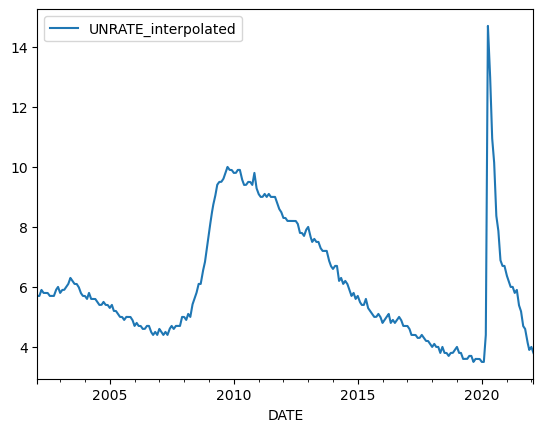

In [7]:

# plot
resampled_df.plot()
plt.show()